In [28]:
# ----------------------------
# 1. Importación de librerías
# ----------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import soundfile as sf

# Configuración de estilo para gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [29]:
# Leemos el csv
dataset_ruta = r'D:\Documentos\IPN\6to Semestre\Aprendizaje_profundo\programas\proyecto\data'
df = pd.read_csv(dataset_ruta + r'\UrbanSound8K.csv')

## Análisis Exploratorio de Datos

In [30]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [31]:
# Descripción numérica
df.describe(include='all')

,slice_file_name,fsID,start,end,salience,fold,classID,class
count,8732,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732
unique,8732,NaN,NaN,NaN,NaN,NaN,NaN,10
top,100032-3-0-0.wav,NaN,NaN,NaN,NaN,NaN,NaN,dog_bark
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,NaN,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877,NaN
std,NaN,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544,NaN
min,NaN,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000,NaN
25%,NaN,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000,NaN
50%,NaN,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000,NaN
75%,NaN,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000,NaN


In [32]:
# Clases únicas
df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [33]:
# Conteo de valores nulos
df.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [34]:
# Distribución por clase
df['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

C:\Users\novac\AppData\Local\Temp\ipykernel_9952\1181367928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="class", order=df["class"].value_counts().index, palette='magma')


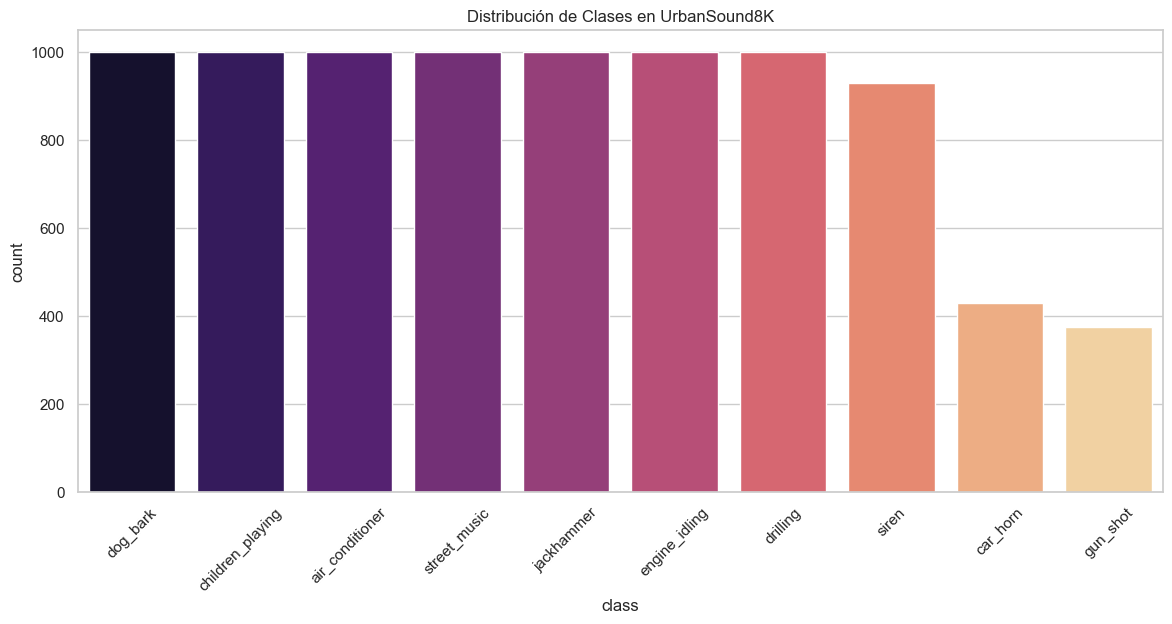

In [35]:
# Conteo por clase
plt.figure(figsize=(14,6))
sns.countplot(data=df, x="class", order=df["class"].value_counts().index, palette='magma')
plt.xticks(rotation=45)
plt.title("Distribución de Clases en UrbanSound8K")
plt.show()


C:\Users\novac\AppData\Local\Temp\ipykernel_9952\4144240467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="fold", palette='Set1')


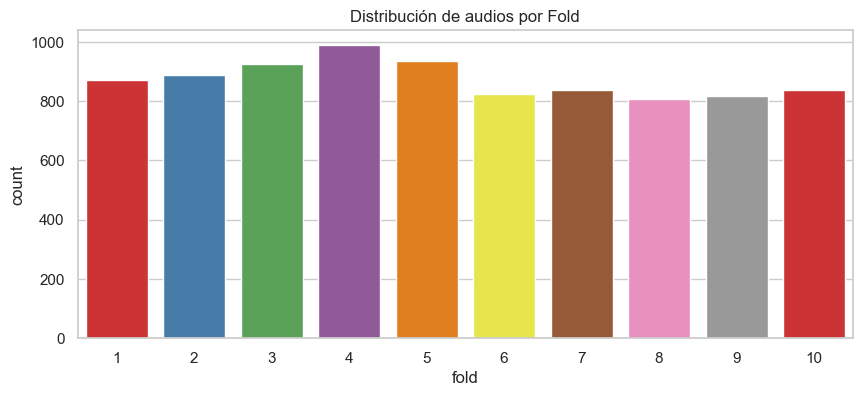

In [36]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="fold", palette='Set1')
plt.title("Distribución de audios por Fold")
plt.show()

In [37]:
# --- Seleccionar una fila aleatoria ---
sample = df.sample(1).iloc[0]
sample

slice_file_name    177742-0-0-3.wav
fsID                         177742
start                           1.5
end                             5.5
salience                          2
fold                              3
classID                           0
class               air_conditioner
Name: 3961, dtype: object

In [38]:
# Ruta del archivo .wav
audio_path = os.path.join(dataset_ruta,  
                          f"fold{sample['fold']}", 
                          sample["slice_file_name"])

# Cargar audio
y, sr = librosa.load(audio_path, sr=None)  # usar sr original
print(f"Duración: {len(y)/sr:.2f} segundos, Sample Rate: {sr}")

print(sf.info(audio_path))

# --- 1. MFCC ---
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

# --- 2. Chroma ---
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# --- 3. Spectral Centroid ---
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# --- 4. Spectral Rolloff ---
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)

# --- 5. Zero Crossing Rate ---
zcr = librosa.feature.zero_crossing_rate(y)

print("MFCC shape:", mfcc.shape)
print("Chroma shape:", chroma.shape)
print("Centroid shape:", centroid.shape)
print("Rolloff shape:", rolloff.shape)
print("ZCR shape:", zcr.shape)

Duración: 4.00 segundos, Sample Rate: 48000
D:\Documentos\IPN\6to Semestre\Aprendizaje_profundo\programas\proyecto\data\fold3\177742-0-0-3.wav
samplerate: 48000 Hz
channels: 2
duration: 4.000 s
format: WAVEX (Microsoft) [WAVEX]
subtype: Signed 24 bit PCM [PCM_24]
MFCC shape: (20, 376)
Chroma shape: (12, 376)
Centroid shape: (1, 376)
Rolloff shape: (1, 376)
ZCR shape: (1, 376)


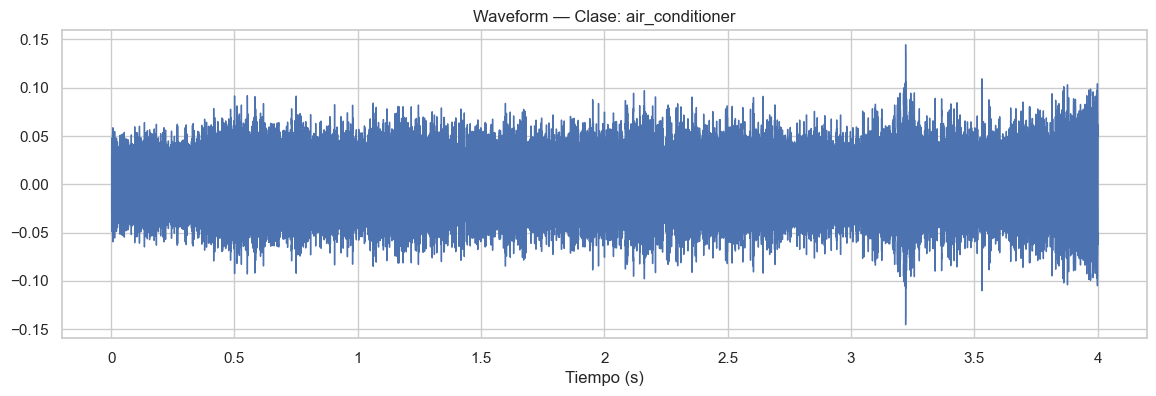

In [39]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform — Clase: {sample['class']}")
plt.xlabel("Tiempo (s)")
plt.show()

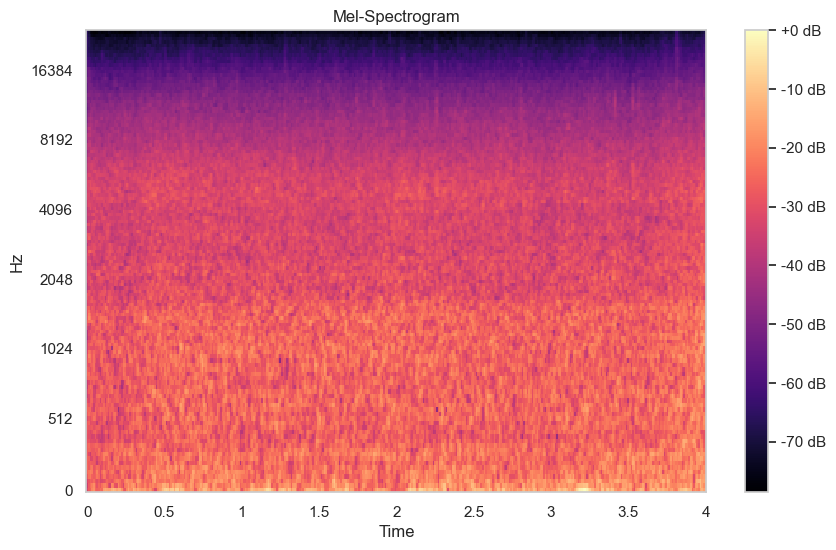

In [40]:
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(10,6))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram")
plt.show()


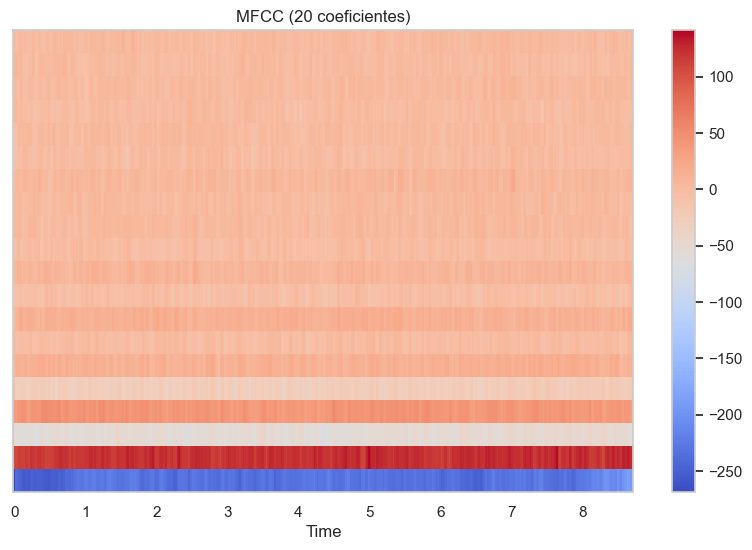

In [41]:
plt.figure(figsize=(10,6))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title("MFCC (20 coeficientes)")
plt.show()

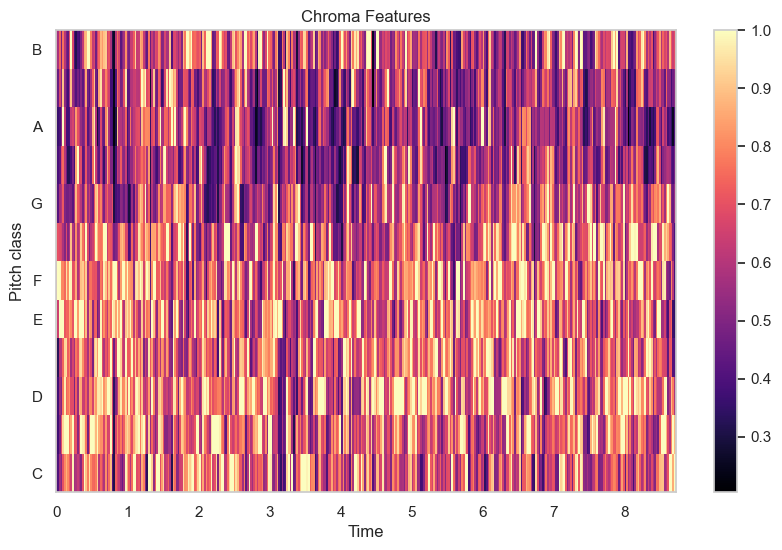

In [42]:
plt.figure(figsize=(10,6))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

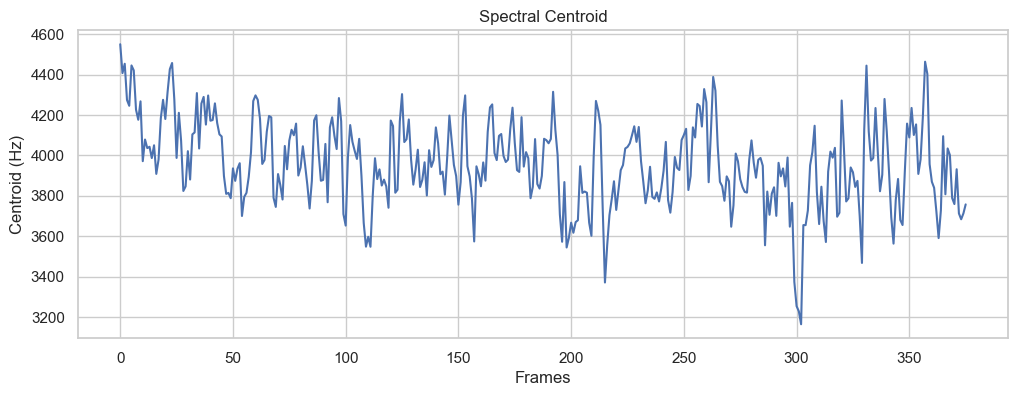

In [43]:
plt.figure(figsize=(12,4))
plt.plot(centroid.T)
plt.title("Spectral Centroid")
plt.xlabel("Frames")
plt.ylabel("Centroid (Hz)")
plt.show()

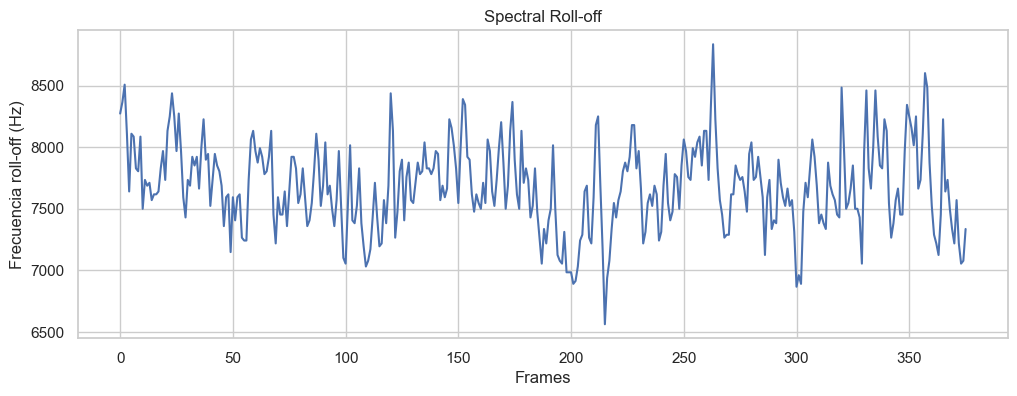

In [44]:

plt.figure(figsize=(12,4))
plt.plot(rolloff.T)
plt.title("Spectral Roll-off")
plt.xlabel("Frames")
plt.ylabel("Frecuencia roll-off (Hz)")
plt.show()

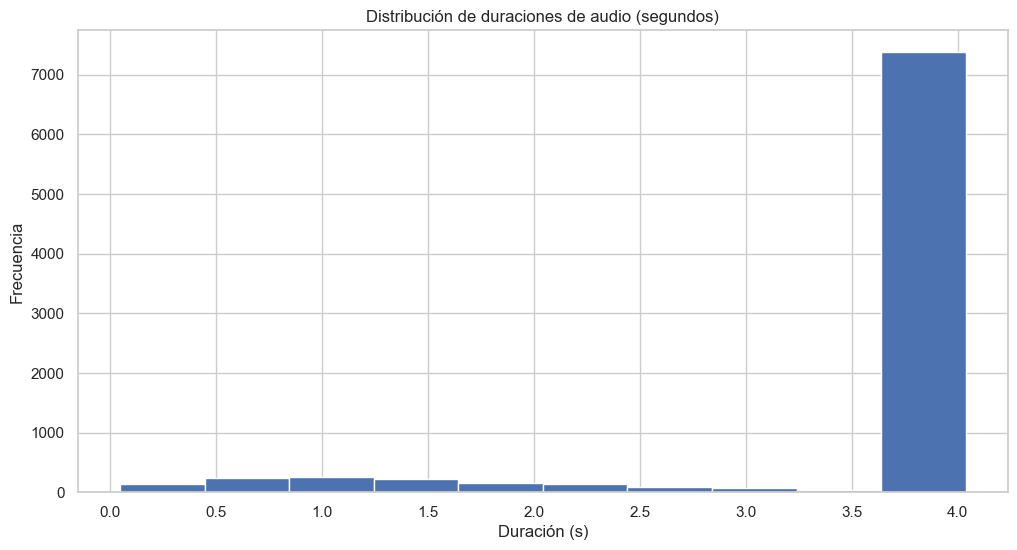

Duración promedio: 3.6075218292463376
Duración mínima: 0.05
Duración máxima: 4.036647314949202


In [45]:
durations = []

for _, row in df.iterrows():
    file = os.path.join(dataset_ruta, f"fold{row['fold']}", row["slice_file_name"])
    try:
        y, sr = sf.read(file)
        durations.append(len(y) / sr)
    except:
        pass

durations = np.array(durations)

plt.hist(durations, bins=10)
plt.title("Distribución de duraciones de audio (segundos)")
plt.xlabel("Duración (s)")
plt.ylabel("Frecuencia")
plt.show()

print("Duración promedio:", durations.mean())
print("Duración mínima:", durations.min())
print("Duración máxima:", durations.max())


## Preprocesamiento

In [65]:

# Carpeta donde se guardarán los especetrogramas
OUTPUT_DIR = r"D:\Documentos\IPN\6to Semestre\Aprendizaje_profundo\programas\proyecto\espectrogramas"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Tamaño final del espectrograma
IMG_SIZE = (128, 128)

# Parámetros de mel
N_MELS = 128
N_FFT = 1024
HOP_LENGTH = 256

print("Directorio de salida:", OUTPUT_DIR)

Directorio de salida: D:\Documentos\IPN\6to Semestre\Aprendizaje_profundo\programas\proyecto\espectrogramas


In [64]:
def generate_mel_spectrogram(y, sr, n_mels=N_MELS, n_fft=N_FFT, hop_length=HOP_LENGTH):
    # Forzar fmax para evitar filtros vacíos
    fmax = sr / 2

    # Generar espectrograma Mel
    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels,
        fmax=fmax
    )

    # Convertir a dB
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # Normalizar entre 0 y 1
    mel_norm = (mel_db - mel_db.min()) / (mel_db.max() - mel_db.min() + 1e-6)

    return mel_norm

In [66]:
import cv2

def process_audio_to_mel(path, img_size=128):
    img_size = int(img_size)

    # Cargar audio con sample rate fijo
    y, sr = librosa.load(path, sr=22050)

    # *** Asegurar duración mínima (1 segundo) ***
    min_samples = sr * 1  # 1 segundo
    if len(y) < min_samples:
        y = np.pad(y, (0, min_samples - len(y)), mode='constant')

    # Generar mel-spectrogram robusto
    mel = generate_mel_spectrogram(y, sr)

    mel = mel.astype(np.float32)

    # Redimensionar siempre a (img_size, img_size)
    mel_resized = cv2.resize(
        mel,
        (img_size, img_size),
        interpolation=cv2.INTER_LINEAR
    )

    mel_resized = np.expand_dims(mel_resized, axis=-1)
    return mel_resized

In [67]:
import tqdm

spectrogram_paths = []
labels = []

for idx, row in tqdm.tqdm(df.iterrows(), total=len(df)):
    audio_path = os.path.join(
        dataset_ruta, 
        f"fold{row['fold']}", 
        row["slice_file_name"]
    )
    
    try:
        mel = process_audio_to_mel(audio_path)

        # Nombre del archivo espectrograma
        out_name = row["slice_file_name"].replace(".wav", ".npy")
        out_path = os.path.join(OUTPUT_DIR, out_name)

        # Guardar tensor
        np.save(out_path, mel)

        spectrogram_paths.append(out_path)
        labels.append(row["classID"])

    except Exception as e:
        print("Error con:", audio_path, " -> ", e)


100%|██████████| 8732/8732 [10:40<00:00, 13.63it/s]


In [68]:
# Creación de df con rutas de los espectogramas
df_mel = pd.DataFrame({
    "spectrogram": spectrogram_paths,
    "label": labels
})

df_mel.head()

,spectrogram,label
0,D:\Documentos\IPN\6to Semestre\Aprendizaje_pro...,3
1,D:\Documentos\IPN\6to Semestre\Aprendizaje_pro...,2
2,D:\Documentos\IPN\6to Semestre\Aprendizaje_pro...,2
3,D:\Documentos\IPN\6to Semestre\Aprendizaje_pro...,2
4,D:\Documentos\IPN\6to Semestre\Aprendizaje_pro...,2


In [69]:
df_mel.to_csv(r"D:\Documentos\IPN\6to Semestre\Aprendizaje_profundo\programas\proyecto\mel_metadata.csv", index=False)
print("Archivo mel_metadata.csv generado.")

Archivo mel_metadata.csv generado.


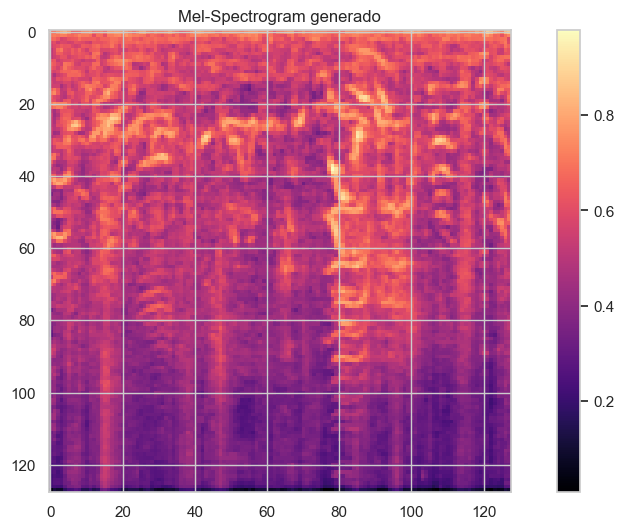

In [70]:
# Tomar uno aleatorio del nuevo dataset
sample_mel_path = df_mel.sample(1).iloc[0]["spectrogram"]
mel_sample = np.load(sample_mel_path)

plt.imshow(mel_sample.squeeze(), cmap="magma")
plt.title("Mel-Spectrogram generado")
plt.colorbar()
plt.show()